# Student Performance Prediction

Enter the data for the student you would like to predict the final grade for, and click the "Run Prediction" button below to view the results. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from ipywidgets import interactive, interact
import ipywidgets as widgets
import pickle
%matplotlib inline

In [3]:
from ipywidgets import Button, HBox, VBox

In [4]:
from ipywidgets import AppLayout, Button, Layout, GridspecLayout

In [5]:
# Load the developed machine learning model
loaded_model = pickle.load(open("stud_reg_rand_for.pkl", "rb"))

# Load Data
student_data = pd.read_csv("student_prediction_CLEAN.csv")
grade_data = pd.read_csv("GRADE_MEAN_DATA.csv")

In [1]:
# Code for reported student data

Age_val = widgets.Dropdown(
            options=[('18-21', 1), ('22-25', 2), ('above 26', 3)],
            value=2,
            description='Age Range:',

        )

Gender_val = widgets.Dropdown(
    options=[('Female', 1), ('Male', 2)],
    value=1,
    description='Gender:',
)
    
HS_type = widgets.Dropdown(
    options=[('Private', 1), ('Public', 2), ('Other', 3)],
    value=2,
    description='HS Type:',
)

Schol_type = widgets.Dropdown(
            options=[
                ('None', 1),
                ('25%', 2),
                ('50%', 3), ('75%', 4), ('100%', 5),
                
            ],
            value=1,
            
        )

Job_val = widgets.Dropdown(
            options=[
                ('Yes',1),
                ('No',2),
            ],
            value=1,
            
        )
    

active_val = widgets.Dropdown(
            options=[
                ('Yes',1),
                ('No',2),
            ],
            value=1,
            
        )

Partner_val = widgets.Dropdown(
            options=[
                ('Yes',1),
                ('No',2),
            ],
            value=1,
            
        )

Transp_val = widgets.Dropdown(
            options=[
                ('Bus', 1),
                ('Private Car / Taxi', 2),
                ('Bicycle', 3), ('Other', 4),                 
            ],
            value=1,
            
        )

Accom_val = widgets.Dropdown(
            options=[
                ('Rental', 1),
                ('Student Housing / Dorm', 2),
                ('With Family', 3), ('Other', 4),                 
            ],
            value=1,
            
        )

Moth_ed_val = widgets.Dropdown(
            options=[
                ('Primary School', 1),
                ('Secondary School', 2),
                ('High School', 3), ('University Degree (Associate or Bachelors)', 4), 
                ('Masters Degree', 5), ('PhD', 6),
            ],
            value=1,
            
        )

Num_sib_val = widgets.Dropdown(
            options=[
                ('0', 1)
                ('1', 1),
                ('2', 2),
                ('3', 3), ('4', 4), 
                ('5 or above', 5), 
            ],
            value=1,
            
        )

Fath_ed_val = widgets.Dropdown(
            options=[
                ('Primary School', 1),
                ('Secondary School', 2),
                ('High School', 3), ('University Degree (Associate or Bachelors)', 4), 
                ('Masters Degree', 5), ('PhD', 6),
            ],
            value=1,
            
        )

Parent_status_val = widgets.Dropdown(
            options=[
                ('Married', 1),
                ('Divorced / Separated', 2),
                ('Deceased (One or both)', 3), 
            ],
            value=1,
            
        )

Moth_occ_val = widgets.Dropdown(
            options=[
                ('Retired', 1),
                ('Housewife', 2),
                ('Government or Public Sector Employee', 3), ('Private Sector Employee', 4), 
                ('Self-Employed', 5), ('Other', 6),
            ],
            value=1,
            
        )

Fath_occ_val = widgets.Dropdown(
            options=[
                ('Retired', 1),
                ('Government or Public Sector Employee', 2),
                ('Private Sector Employee', 3),  
                ('Self-Employed', 4), ('Other', 5),
            ],
            value=1,
            
        )

week_study_hours_val = widgets.Dropdown(
            options=[
                ('None', 1),
                ('Less than 5 hours', 2),
                ('6-10 Hours', 3),  
                ('11-20 Hours', 4), ('More than 20 hours', 5),
            ],
            value=1,
            
        )

read_freq_sci_val = widgets.Dropdown(
            options=[
                ('None', 1),
                ('Sometimes', 2),
                ('Often', 3),  
            ],
            value=1,
            
        )

read_freq_nonsci_val = widgets.Dropdown(
            options=[
                ('None', 1),
                ('Sometimes', 2),
                ('Often', 3),  
            ],
            value=1,
            
        )

sem_attend_val = widgets.Dropdown(
            options=[
                ('Yes', 1),
                ('No', 2),
 
            ],
            value=1,
            
        )

proj_impact_nonsci_val = widgets.Dropdown(
            options=[
                ('Positive', 1),
                ('Negative', 2),
                ('Neutral', 3),  
            ],
            value=1,
            
        )

attendance_val = widgets.Dropdown(
            options=[
                ('Always', 1),
                ('Sometimes', 2),
                ('Never', 3),  
            ],
            value=1,
            
        )

midterms_val = widgets.Dropdown(
            options=[
                ('Alone', 1),
                ('With Friends', 2),
                ('Not Applicable', 3),  
            ],
            value=1,
            
        )

midterms_when_val = widgets.Dropdown(
            options=[
                ('Close to exam time', 1),
                ('Throughout the term', 2),
                ('Never', 3),  
            ],
            value=1,
            
        )

notes_val = widgets.Dropdown(
            options=[
                ('Never', 1),
                ('Sometimes', 2),
                ('Always', 3),  
            ],
            value=1,
            
        )

listening_val = widgets.Dropdown(
            options=[
                ('Never', 1),
                ('Sometimes', 2),
                ('Always', 3),  
            ],
            value=1,
            
        )

description_val = widgets.Dropdown(
            options=[
                ('Never', 1),
                ('Sometimes', 2),
                ('Always', 3),   
            ],
            value=1,
            
        )

cumulative_val = widgets.Dropdown(
            options=[
                 ('Less than 2.00', 1),
                ('2.00 - 2.49', 2),
                ('2.50 - 3.00', 3), 
                ('3.00 - 3.49', 4),
                ('Above 3.49', 5),
                 
            ],
            value=1,
        
        )

expected_gpa_val = widgets.Dropdown(
            options=[
                 ('Less than 2.00', 1),
                ('2.00 - 2.49', 2),
                ('2.50 - 3.00', 3), 
                ('3.00 - 3.49', 4),
                ('Above 3.49', 5),
                 
            ],
            value=1,
            
        )

course_id_val = widgets.Dropdown(
            options=[
                 ('MTH 251', 1),
                ('MTH 230', 2),
                ('MTH 252', 3), 
                ('CS 101', 4),
                ('CS 150', 5),
                ('CS 151', 6),
                ('CS 152', 7),
                ('CS 200', 8),
                ('CS 201', 9),
                 
            ],
            value=1,
            
        )

<>:94: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:94: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?


NameError: name 'widgets' is not defined

In [7]:
# Create labels

from ipywidgets import widgets

# label definitions
lblschol = widgets.Label(value='How much scholarship received?:')
lbljob = widgets.Label(value='Do you have a job outside of school?')
lbl_active = widgets.Label(value="Do you participate in regular artistic or sports activity?")
lbl_partner = widgets.Label(value="Do you have a partner?")
lbl_transport = widgets.Label(value="What kind of transportation do you use to get to school?")
lbl_accom = widgets.Label(value="Where do you live?")
lbl_moth_ed = widgets.Label(value="What was your mother's highest completed education level?")
lbl_fath_ed = widgets.Label(value="What was your father's highest completed education level?")
lbl_num_siblings = widgets.Label(value="Enter number of siblings (enter 1 if there are no siblings)?")
lbl_parental_status = widgets.Label(value="What is your parent's marital status?")
lbl_moth_occu = widgets.Label(value="What is your Mother's occupation?")
lbl_fath_occu = widgets.Label(value="What is your Father's occupation?")
lbl_study_hours = widgets.Label(value="How many hours do you typically study in a week?")
lbl_readfreq_non = widgets.Label(value="How many hours per week do you read non-scientific books & journals?")
lbl_readfreq_sci = widgets.Label(value="How many hours per week do you read scientific books & journals")
lbl_seminars = widgets.Label(value="Do you attend seminars and/or conferences held by your major's department?")
lbl_impact = widgets.Label(value="What kind of impact do you feel your projects/activities have on your academic success?")
lbl_attend = widgets.Label(value="How often do you attend classes?")
lbl_midterm_how = widgets.Label(value="How do you study for your midterms?")
lbl_midterm_when = widgets.Label(value="When do you start preparing for midterms?")
lbl_notes = widgets.Label(value="How often do you take notes in class?")
lbl_listening = widgets.Label(value="How often do you listen to class lectures?")
lbl_discussion = widgets.Label(value="Do you feel discussion improves your interest and success in courses?")
lbl_gpa = widgets.Label(value="What was your cumulative GPA in the last term you took classes?")
lbl_gpa_expected = widgets.Label(value="What do you expect your cumulative GPA will be by the time you graduate?")
lbl_course_id = widgets.Label(value="What is the course ID this was collected for?")
btn=widgets.Button(description="Run Prediction")
out = widgets.Output(layout={'border': '1px solid black'})



In [20]:
# prediction function
def run_prediction(b):
    out.clear_output()
    x = np.array([int(Age_val.value),int(Gender_val.value),int(HS_type.value),int(Schol_type.value),int(Job_val.value),int(active_val.value),int(Partner_val.value),int(Transp_val.value),int(Accom_val.value),int(Moth_ed_val.value),int(Fath_ed_val.value),int(Num_sib_val.value),int(Parent_status_val.value),int(Moth_occ_val.value),int(Fath_occ_val.value),int(week_study_hours_val.value),int(read_freq_sci_val.value),int(read_freq_nonsci_val.value),int(sem_attend_val.value),int(proj_impact_nonsci_val.value),int(attendance_val.value),int(midterms_val.value),int(midterms_when_val.value),int(notes_val.value),int(listening_val.value),int(description_val.value),int(cumulative_val.value),int(expected_gpa_val.value),int(course_id_val.value)])
    mod = x.reshape(1, -1)
    prediction = loaded_model.predict(mod)
    grade = float(prediction)
    course_id = int(course_id_val.value)
    letter_grade = return_grade(grade)
    mean = calc_difference_from_mean(course_id)
    with out:
        print('Estimated final grade is ' + str(grade) + ' for a letter grade of ' + letter_grade + '.')
        print('The mean grade for this course amongst all surveyed students is ' + str(mean) + '.')
        
def calc_difference_from_mean(course_id):
    mean = 0
    if course_id == 1:
        mean = 2.2879
    elif course_id == 2:
        mean = 3
    elif course_id == 3:
        mean = 6.125
    elif course_id == 4:
        mean = 4.5
    elif course_id == 5:
        mean = 5.285714
    elif course_id == 6:
        mean = 5.875
    elif course_id == 7:
        mean = 6.333333
    elif course_id == 8:
        mean = 1.357143
    else:
        mean = 2.190476
    
    return mean


def return_grade(grade):
    if grade < 1:
        letter_grade = 'F'
    elif grade > 1 and grade < 2:
        letter_grade = 'D'
    elif grade > 2 and grade < 3:
        letter_grade = 'C-'
    elif grade > 3 and grade < 4:
        letter_grade = 'C'
    elif grade > 4 and grade < 5:
        letter_grade = 'B-'
    elif grade > 5 and grade < 6:
        letter_grade = 'B'
    elif grade > 6 and grade < 7:
        letter_grade = 'A-'
    else:
        letter_grade = 'A'
        
    return letter_grade
        
     
        

    
        

In [34]:
#display form elements

display(Age_val)
display(Gender_val)
display(HS_type)
display(lblschol)
display(Schol_type)
display(lbljob)
display(Job_val)
display(lbl_active)
display(active_val)
display(lbl_partner)
display(Partner_val)
display(lbl_transport)
display(Transp_val)
display(lbl_accom)
display(Accom_val)
display(lbl_moth_ed)
display(Moth_ed_val)
display(lbl_fath_ed)
display(Fath_ed_val)
display(lbl_num_siblings)
display(Num_sib_val)
display(lbl_parental_status)
display(Parent_status_val)
display(lbl_moth_occu)
display(Moth_occ_val)
display(lbl_fath_occu)
display(Fath_occ_val)
display(lbl_study_hours)
display(week_study_hours_val)
display(lbl_readfreq_non)
display(read_freq_nonsci_val)
display(lbl_readfreq_sci)
display(read_freq_sci_val)
display(lbl_seminars)
display(sem_attend_val)
display(lbl_impact)
display(proj_impact_nonsci_val)
display(lbl_attend)
display(attendance_val)
display(lbl_midterm_how)
display(midterms_val)
display(lbl_midterm_when)
display(midterms_when_val)
display(lbl_notes)
display(notes_val)
display(lbl_listening)
display(listening_val)
display(lbl_discussion)
display(description_val)
display(lbl_gpa)
display(cumulative_val)
display(lbl_gpa_expected)
display(expected_gpa_val)
display(lbl_course_id)
display(course_id_val)

display(btn)
display(out)


btn.on_click(run_prediction)

Dropdown(description='Age Range:', index=1, options=(('18-21', 1), ('22-25', 2), ('above 26', 3)), value=2)

Dropdown(description='Gender:', options=(('Female', 1), ('Male', 2)), value=1)

Dropdown(description='HS Type:', index=1, options=(('Private', 1), ('Public', 2), ('Other', 3)), value=2)

Label(value='How much scholarship received?:')

Dropdown(options=(('None', 1), ('25%', 2), ('50%', 3), ('75%', 4), ('100%', 5)), value=1)

Label(value='Do you have a job outside of school?')

Dropdown(options=(('Yes', 1), ('No', 2)), value=1)

Label(value='Do you participate in regular artistic or sports activity?')

Dropdown(options=(('Yes', 1), ('No', 2)), value=1)

Label(value='Do you have a partner?')

Dropdown(options=(('Yes', 1), ('No', 2)), value=1)

Label(value='What kind of transportation do you use to get to school?')

Dropdown(options=(('Bus', 1), ('Private Car / Taxi', 2), ('Bicycle', 3), ('Other', 4)), value=1)

Label(value='Where do you live?')

Dropdown(options=(('Rental', 1), ('Student Housing / Dorm', 2), ('With Family', 3), ('Other', 4)), value=1)

Label(value="What was your mother's highest completed education level?")

Dropdown(options=(('Primary School', 1), ('Secondary School', 2), ('High School', 3), ('University Degree (Ass…

Label(value="What was your father's highest completed education level?")

Dropdown(options=(('Primary School', 1), ('Secondary School', 2), ('High School', 3), ('University Degree (Ass…

Label(value='Enter number of siblings (enter 1 if there are no siblings)?')

Dropdown(options=(('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5 or above', 5)), value=1)

Label(value="What is your parent's marital status?")

Dropdown(options=(('Married', 1), ('Divorced / Separated', 2), ('Deceased (One or both)', 3)), value=1)

Label(value="What is your Mother's occupation?")

Dropdown(options=(('Retired', 1), ('Housewife', 2), ('Government or Public Sector Employee', 3), ('Private Sec…

Label(value="What is your Father's occupation?")

Dropdown(options=(('Retired', 1), ('Government or Public Sector Employee', 2), ('Private Sector Employee', 3),…

Label(value='How many hours do you typically study in a week?')

Dropdown(options=(('None', 1), ('Less than 5 hours', 2), ('6-10 Hours', 3), ('11-20 Hours', 4), ('More than 20…

Label(value='How many hours per week do you read non-scientific books & journals?')

Dropdown(options=(('None', 1), ('Sometimes', 2), ('Often', 3)), value=1)

Label(value='How many hours per week do you read scientific books & journals')

Dropdown(options=(('None', 1), ('Sometimes', 2), ('Often', 3)), value=1)

Label(value="Do you attend seminars and/or conferences held by your major's department?")

Dropdown(options=(('Yes', 1), ('No', 2)), value=1)

Label(value='What kind of impact do you feel your projects/activities have on your academic success?')

Dropdown(options=(('Positive', 1), ('Negative', 2), ('Neutral', 3)), value=1)

Label(value='How often do you attend classes?')

Dropdown(options=(('Always', 1), ('Sometimes', 2), ('Never', 3)), value=1)

Label(value='How do you study for your midterms?')

Dropdown(options=(('Alone', 1), ('With Friends', 2), ('Not Applicable', 3)), value=1)

Label(value='When do you start preparing for midterms?')

Dropdown(options=(('Close to exam time', 1), ('Throughout the term', 2), ('Never', 3)), value=1)

Label(value='How often do you take notes in class?')

Dropdown(options=(('Never', 1), ('Sometimes', 2), ('Always', 3)), value=1)

Label(value='How often do you listen to class lectures?')

Dropdown(options=(('Never', 1), ('Sometimes', 2), ('Always', 3)), value=1)

Label(value='Do you feel discussion improves your interest and success in courses?')

Dropdown(options=(('Never', 1), ('Sometimes', 2), ('Always', 3)), value=1)

Label(value='What was your cumulative GPA in the last term you took classes?')

Dropdown(options=(('Less than 2.00', 1), ('2.00 - 2.49', 2), ('2.50 - 3.00', 3), ('3.00 - 3.49', 4), ('Above 3…

Label(value='What do you expect your cumulative GPA will be by the time you graduate?')

Dropdown(options=(('Less than 2.00', 1), ('2.00 - 2.49', 2), ('2.50 - 3.00', 3), ('3.00 - 3.49', 4), ('Above 3…

Label(value='What is the course ID this was collected for?')

Dropdown(index=1, options=(('MTH 251', 1), ('MTH 230', 2), ('MTH 252', 3), ('CS 101', 4), ('CS 150', 5), ('CS …

Button(description='Run Prediction', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'), outputs=({'output_type': 'stream', 'text': 'Estimated final gr…

C:\Users\eyarr\Dropbox\WGU\Term4\Capstone\Project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\eyarr\Dropbox\WGU\Term4\Capstone\Project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\eyarr\Dropbox\WGU\Term4\Capstone\Project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\eyarr\Dropbox\WGU\Term4\Capstone\Project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\eyarr\Dropbox\WGU\Term4\Capstone\Project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature 

In [36]:
file = open("grade_distro_by_course.png", "rb")
image = file.read()
grade_distro = widgets.Image(
    value=image,
    format='png',
    width=600,
    height=400,
)

In [37]:
file = open("mean_grade_by_course.png", "rb")
image = file.read()
mean_grade = widgets.Image(
    value=image,
    format='png',
    width=600,
    height=400,
)

## Analysis


**Figure 1** *Grade Distribution by Course ID*: Shows the distribution of grades across the nine courses surveyed. <br>
**Figure 2** *Mean Grade by Course ID*: Describes the mean grades across all students, categorized by Course ID. 

In [38]:
HBox([grade_distro, mean_grade])

**Figure 3** *Feature Distribution*: A visualization that charts the distribution of values for all features used in the model. 

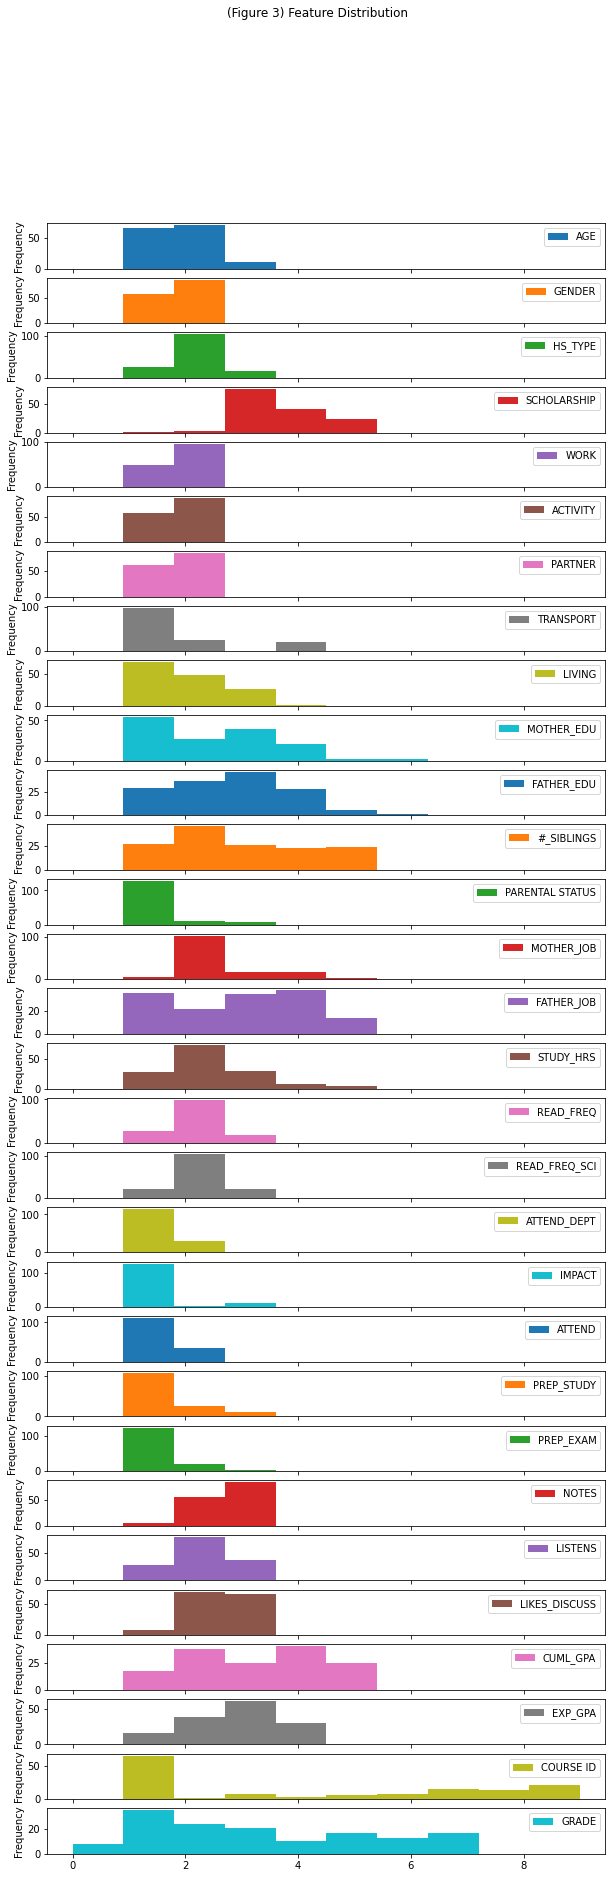

In [39]:
fig2 = student_data.plot.hist(title = '(Figure 3) Feature Distribution', figsize=(10, 30), subplots=True);